# Import Libraries 

In [1]:
# Some Base Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
plt.style.use('fivethirtyeight')
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import gc

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

# Some Additional Libraries
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Importing Data 

In [2]:
# Paths
path_input = 'input/'
path_output = 'output/'
path_model = 'model/'

In [3]:
# Read Data
train = pd.read_csv(path_input + 'train.csv')
test = pd.read_csv(path_input + 'test.csv')
train.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,Year_Sale,Month_Sale,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,2011,5,131,1.0,1.0,3,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,2006,12,26,2.0,1.0,5,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,2012,2,70,1.0,1.0,3,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,2010,3,14,3.0,2.0,5,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,2009,10,84,1.0,1.0,3,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
# Storing important items:
nTrain = train.shape[0]
nTest = test.shape[0]

idCol = 'PRT_ID'
response = 'SALES_PRICE'

# Storing ids
sub_ids = test[idCol]
train_ids = train[idCol]

# Storing Target variable
train_target = train[response]

print("The train data size: {} ".format(nTrain))
print("The test data size: {} ".format(nTest))

print("\nID Column Name is: {} ".format(idCol))
print("Response Column Name is: {} ".format(response))

The train data size: 7109 
The test data size: 2925 

ID Column Name is: PRT_ID 
Response Column Name is: SALES_PRICE 


In [5]:
# Combining train and test data
full = train.append(test)
full.shape
full.head(7)

,AREA,Age,BUILDTYPE,COMMIS,DATE_BUILD,DATE_SALE,DIST_MAINROAD,INT_SQFT,MZZONE,Month_Build,...,QS_BEDROOM,QS_OVERALL,QS_ROOMS,REG_FEE,SALES_PRICE,SALE_COND,STREET,UTILITY_AVAIL,Year_Sale,Year_build
0,Karapakkam,44.0,Commercial,144400,15-05-1967,04-05-2011,131,1004,A,5,...,4.9,4.330,4.0,380000,7600000.0,AbNormal,Paved,AllPub,2011,1967
1,Anna Nagar,11.0,Commercial,304049,22-12-1995,19-12-2006,26,1986,RH,12,...,2.5,3.765,4.9,760122,21717770.0,AbNormal,Gravel,AllPub,2006,1995
2,Adyar,20.0,Commercial,92114,09-02-1992,04-02-2012,70,909,RL,2,...,2.2,3.090,4.1,421094,13159200.0,AbNormal,Gravel,ELO,2012,1992
3,Velachery,22.0,Others,77042,18-03-1988,13-03-2010,14,1855,I,3,...,3.6,4.010,4.7,356321,9630290.0,Family,Paved,NoSewr,2010,1988
4,Karapakkam,30.0,Others,74063,13-10-1979,05-10-2009,84,1226,C,10,...,4.1,3.290,3.0,237000,7406250.0,AbNormal,Gravel,AllPub,2009,1979
5,Chrompet,5.0,Commercial,198316,12-09-2009,11-09-2014,36,1220,RH,9,...,3.1,3.320,4.5,409027,12394750.0,Partial,No Access,NoSeWa,2014,2009
6,Chrompet,28.0,Other,33955,12-04-1979,05-04-2007,137,1167,RL,4,...,2.5,2.670,3.6,263152,8488790.0,Partial,No Access,AllPub,2007,1979


In [6]:
# Drop Variables idCols and Date

fdrop = [idCol, response, 'DATE_BUILD', 'DATE_SALE']
full.drop(fdrop, axis = 1, inplace = True)
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10034 entries, 0 to 2924
Data columns (total 23 columns):
AREA             10034 non-null object
Age              10034 non-null float64
BUILDTYPE        10034 non-null object
COMMIS           10034 non-null int64
DIST_MAINROAD    10034 non-null int64
INT_SQFT         10034 non-null int64
MZZONE           10034 non-null object
Month_Build      10034 non-null int64
Month_Sale       10034 non-null int64
N_BATHROOM       10029 non-null float64
N_BEDROOM        10033 non-null float64
N_ROOM           10034 non-null int64
PARK_FACIL       10034 non-null object
QS_BATHROOM      10034 non-null float64
QS_BEDROOM       10034 non-null float64
QS_OVERALL       9967 non-null float64
QS_ROOMS         10034 non-null float64
REG_FEE          10034 non-null int64
SALE_COND        10034 non-null object
STREET           10034 non-null object
UTILITY_AVAIL    10034 non-null object
Year_Sale        10034 non-null int64
Year_build       10034 non-null int6

# Data Processing 

## Target Variable


Skewness of Target Variable is = 0.77 

mu = 10894909.64 and sigma = 3768338.39



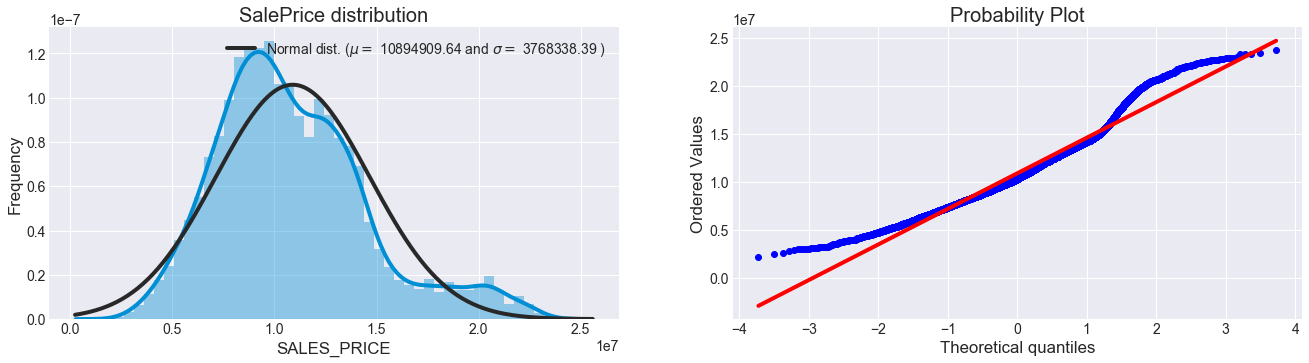

In [7]:
print( '\nSkewness of Target Variable is = {:.2f} \n'.format(stats.skew(train_target)))

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(train_target , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_target)
print('mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
plt.subplot(122)
res = stats.probplot(train_target, plot=plt)

## Explanatory Variables

### Specifying Numeric And Categorical Colums

In [8]:
# Numeric Variables
num_cols = [x for x in full.columns if full[x].dtype != 'object']
num_cols

['Age',
 'COMMIS',
 'DIST_MAINROAD',
 'INT_SQFT',
 'Month_Build',
 'Month_Sale',
 'N_BATHROOM',
 'N_BEDROOM',
 'N_ROOM',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'QS_ROOMS',
 'REG_FEE',
 'Year_Sale',
 'Year_build']

In [9]:
# Check the skew of all numerical features
skewed_feats = full[num_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
N_BATHROOM,1.384756
N_BEDROOM,1.135104
REG_FEE,1.015070
COMMIS,0.950221
Age,0.288079
INT_SQFT,0.114901
N_ROOM,0.095543
DIST_MAINROAD,0.036859
QS_BEDROOM,0.013232
QS_BATHROOM,0.011783


In [10]:
# Object Variables
obj_cols = [x for x in full.columns if full[x].dtype == 'object']
obj_cols = list(set(obj_cols) - set([]))
obj_cols

['UTILITY_AVAIL',
 'BUILDTYPE',
 'MZZONE',
 'AREA',
 'PARK_FACIL',
 'STREET',
 'SALE_COND']

### Data Correction

In [11]:
full['AREA'].value_counts()
full['AREA'] = full['AREA'].map({'Karapakam': 'Karapakkam', 'Karapakkam': 'Karapakkam', 
                                 'Velchery': 'Velachery', 'Velachery': 'Velachery',
                                 'T Nagar': 'TNagar', 'TNagar': 'TNagar',
                                 'Chrmpet': 'Chrompet', 'Chormpet': 'Chrompet', 'Chrompt': 'Chrompet', 'Chrompet': 'Chrompet',
                                 'Ann Nagar': 'AnnaNagar', 'Anna Nagar': 'AnnaNagar', 'Ana Nagar': 'AnnaNagar',
                                 'Adyr': 'Adyar', 'Adyar': 'Adyar',
                                 'KK Nagar': 'KKNagar', 'KKNagar': 'KKNagar'})
full['AREA'].value_counts()

Chrompet      2427
Karapakkam    1884
KKNagar       1410
Velachery     1403
AnnaNagar     1123
Adyar         1072
TNagar         715
Name: AREA, dtype: int64

In [12]:
# Changing labels
full['SALE_COND'].value_counts()
full['SALE_COND'] = full['SALE_COND'].map({'Family': 'Family', 
                                           'Partial': 'Partial', 'Partiall': 'Partial', 'PartiaLl': 'Partial',
                                           'Normal Sale': 'NormalSale',
                                           'AdjLand': 'AdjLand', 'Adj Land': 'AdjLand',
                                           'AbNormal': 'AbNormal', 'Ab Normal': 'AbNormal'})
full['SALE_COND'].value_counts()

Partial       2015
Family        2008
AdjLand       2006
AbNormal      2004
NormalSale    2001
Name: SALE_COND, dtype: int64

In [13]:
# Changing labels
full['PARK_FACIL'].value_counts()
full['PARK_FACIL'] = full['PARK_FACIL'].map({'Yes': 1, 
                                             'No': 0, 'Noo': 0})
full['PARK_FACIL'].value_counts()

1    5059
0    4975
Name: PARK_FACIL, dtype: int64

In [14]:
# Changing labels
full['BUILDTYPE'].value_counts()
full['BUILDTYPE'] = full['BUILDTYPE'].map({'House': 'House', 
                                           'Others': 'Others', 'Other': 'Others',
                                           'Commercial': 'Commercial', 'Comercial': 'Commercial', 'Commercil': 'Commercial'})
full['BUILDTYPE'].value_counts()

House         3395
Others        3334
Commercial    3305
Name: BUILDTYPE, dtype: int64

In [15]:
# Changing labels
full['UTILITY_AVAIL'].value_counts()
full['UTILITY_AVAIL'] = full['UTILITY_AVAIL'].map({'ELO': 1, 'NoSeWa': 2, 'NoSewr ': 3, 'AllPub': 4, 'All Pub': 4}).astype(int)
full['UTILITY_AVAIL'].value_counts()

4    2684
2    2649
3    2581
1    2120
Name: UTILITY_AVAIL, dtype: int64

In [16]:
# Changing labels
full['STREET'].value_counts()
full['STREET'] = full['STREET'].map({'Paved': 2, 'Pavd': 2,
                                     'Gravel': 1,
                                     'No Access': 0, 'NoAccess': 0})
full['STREET'].value_counts()

1    3620
2    3599
0    2815
Name: STREET, dtype: int64

In [17]:
# Factorizing Outlet_Location_Type
full['MZZONE_INT'] = full['MZZONE'].map({'A': 1, 'C': 2, 'I': 3,
                                         'RH': 7, 'RL': 8, 'RM': 9}).astype(int)
full['MZZONE_INT'].value_counts()

9    2613
7    2601
8    2601
2     747
3     741
1     731
Name: MZZONE_INT, dtype: int64

### Missing Data Imputation

In [18]:
# Checking Missing Values
full.isnull().sum().sort_values(ascending = False)

QS_OVERALL       67
N_BATHROOM        5
N_BEDROOM         1
MZZONE_INT        0
Age               0
BUILDTYPE         0
COMMIS            0
DIST_MAINROAD     0
INT_SQFT          0
MZZONE            0
Month_Build       0
Month_Sale        0
N_ROOM            0
Year_build        0
PARK_FACIL        0
QS_BATHROOM       0
QS_BEDROOM        0
QS_ROOMS          0
REG_FEE           0
SALE_COND         0
STREET            0
UTILITY_AVAIL     0
Year_Sale         0
AREA              0
dtype: int64

In [19]:
# Missing Value in N_Bathroom and N_Bedroom
full['N_BATHROOM'].fillna(full['N_BATHROOM'].mode()[0], inplace = True)
full['N_BEDROOM'].fillna(2, inplace = True)

In [20]:
# Updated Object Variables
obj_cols = [x for x in full.columns if full[x].dtype == 'object']
obj_cols = list(set(obj_cols) - set([]))
obj_cols

['AREA', 'SALE_COND', 'BUILDTYPE', 'MZZONE']

In [21]:
# Creating Dummy Variables
temp = pd.get_dummies(full, columns = obj_cols)
temp.head()

,Age,COMMIS,DIST_MAINROAD,INT_SQFT,Month_Build,Month_Sale,N_BATHROOM,N_BEDROOM,N_ROOM,PARK_FACIL,...,SALE_COND_Partial,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,44.0,144400,131,1004,5,5,1.0,1.0,3,1,...,0,1,0,0,1,0,0,0,0,0
1,11.0,304049,26,1986,12,12,1.0,2.0,5,0,...,0,1,0,0,0,0,0,1,0,0
2,20.0,92114,70,909,2,2,1.0,1.0,3,1,...,0,1,0,0,0,0,0,0,1,0
3,22.0,77042,14,1855,3,3,2.0,3.0,5,0,...,0,0,0,1,0,0,1,0,0,0
4,30.0,74063,84,1226,10,10,1.0,1.0,3,1,...,0,0,0,1,0,1,0,0,0,0


In [22]:
a = np.argwhere(np.isnan(temp['QS_OVERALL']))
a = a.reshape(-1)
imp_nan = temp.iloc[a]
imp_val = temp[temp['QS_OVERALL'].notnull()]

In [23]:
imp_val['QS_OVERALL'].head()

0    4.330
1    3.765
2    3.090
3    4.010
4    3.290
Name: QS_OVERALL, dtype: float64

In [24]:
temp['QS_OVERALL'].iloc[a].head()

15    NaN
46    NaN
86    NaN
111   NaN
134   NaN
Name: QS_OVERALL, dtype: float64

In [25]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 200, n_jobs = 3)
rf_cv = cross_validate(rf, imp_val.drop(['QS_OVERALL'], axis = 1), 
                       imp_val['QS_OVERALL'], cv = 5, verbose = 2)
rf_cv

[CV]  ................................................................
[CV] ................................................. , total=   6.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s


[CV] ................................................. , total=   6.6s
[CV]  ................................................................
[CV] ................................................. , total=   6.8s
[CV]  ................................................................
[CV] ................................................. , total=   7.1s
[CV]  ................................................................
[CV] ................................................. , total=   7.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   36.4s finished


{'fit_time': array([ 6.7898097 ,  6.58289814,  6.80922651,  7.108742  ,  7.42497253]),
 'score_time': array([ 0.10373163,  0.11462641,  0.10414839,  0.10548806,  0.10419679]),
 'test_score': array([ 0.98613107,  0.98588859,  0.9861074 ,  0.98621057,  0.98548825]),
 'train_score': array([ 0.99804097,  0.99798109,  0.99800891,  0.99801535,  0.99806781])}

In [26]:
rf.fit(imp_val.drop(['QS_OVERALL'], axis = 1), imp_val['QS_OVERALL'])
pred = rf.predict(imp_nan.drop(['QS_OVERALL'], axis = 1))

full['QS_OVERALL'].iloc[a] = pred
del temp, imp_nan, imp_val, pred; gc.collect()

48

In [27]:
full.isnull().sum().sort_values(ascending = False)

MZZONE_INT       0
Year_build       0
Age              0
BUILDTYPE        0
COMMIS           0
DIST_MAINROAD    0
INT_SQFT         0
MZZONE           0
Month_Build      0
Month_Sale       0
N_BATHROOM       0
N_BEDROOM        0
N_ROOM           0
PARK_FACIL       0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
QS_ROOMS         0
REG_FEE          0
SALE_COND        0
STREET           0
UTILITY_AVAIL    0
Year_Sale        0
AREA             0
dtype: int64

###### Removed All missing Values

In [28]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10034 entries, 0 to 2924
Data columns (total 24 columns):
AREA             10034 non-null object
Age              10034 non-null float64
BUILDTYPE        10034 non-null object
COMMIS           10034 non-null int64
DIST_MAINROAD    10034 non-null int64
INT_SQFT         10034 non-null int64
MZZONE           10034 non-null object
Month_Build      10034 non-null int64
Month_Sale       10034 non-null int64
N_BATHROOM       10034 non-null float64
N_BEDROOM        10034 non-null float64
N_ROOM           10034 non-null int64
PARK_FACIL       10034 non-null int64
QS_BATHROOM      10034 non-null float64
QS_BEDROOM       10034 non-null float64
QS_OVERALL       10034 non-null float64
QS_ROOMS         10034 non-null float64
REG_FEE          10034 non-null int64
SALE_COND        10034 non-null object
STREET           10034 non-null int64
UTILITY_AVAIL    10034 non-null int32
Year_Sale        10034 non-null int64
Year_build       10034 non-null int64


In [29]:
full.iloc[0:nTrain, full.columns.get_loc('AREA')].shape

(7109,)

In [30]:
full.to_csv(path_input + 'full_cleaned.csv', index=False)

### Feature Engineering

In [31]:
full_new = full.copy()
full_new.head()

,AREA,Age,BUILDTYPE,COMMIS,DIST_MAINROAD,INT_SQFT,MZZONE,Month_Build,Month_Sale,N_BATHROOM,...,QS_BEDROOM,QS_OVERALL,QS_ROOMS,REG_FEE,SALE_COND,STREET,UTILITY_AVAIL,Year_Sale,Year_build,MZZONE_INT
0,Karapakkam,44.0,Commercial,144400,131,1004,A,5,5,1.0,...,4.9,4.330,4.0,380000,AbNormal,2,4,2011,1967,1
1,AnnaNagar,11.0,Commercial,304049,26,1986,RH,12,12,1.0,...,2.5,3.765,4.9,760122,AbNormal,1,4,2006,1995,7
2,Adyar,20.0,Commercial,92114,70,909,RL,2,2,1.0,...,2.2,3.090,4.1,421094,AbNormal,1,1,2012,1992,8
3,Velachery,22.0,Others,77042,14,1855,I,3,3,2.0,...,3.6,4.010,4.7,356321,Family,2,3,2010,1988,3
4,Karapakkam,30.0,Others,74063,84,1226,C,10,10,1.0,...,4.1,3.290,3.0,237000,AbNormal,1,4,2009,1979,2


In [32]:
# Creating New Feature: SQFT_BIN
full_new['SQFT_BIN'] = pd.cut(full_new['INT_SQFT'], 10, labels=[1,2,3,4,5,6,7,8,9,10]).astype(int)
full_new['SQFT_BIN'].value_counts()

6     1852
7     1533
4     1464
3     1459
2     1353
8      846
5      595
1      456
10     247
9      229
Name: SQFT_BIN, dtype: int64

In [33]:
# Creating New Feature: QS_BEDROOM_BIN
full_new['QS_BEDROOM_BIN'] = pd.cut(full_new['QS_BEDROOM'], bins=[1.5,3,4,5.1], labels=[3,4,5]).astype(int)
full_new['QS_BEDROOM_BIN'].value_counts()

3    3561
4    3285
5    3188
Name: QS_BEDROOM_BIN, dtype: int64

In [34]:
pd.cut(full_new['DIST_MAINROAD'], bins=[-1,50,100,150,201], labels=[1.5,2,3,4.1]).astype(int).value_counts()

1    2591
2    2570
3    2479
4    2394
Name: DIST_MAINROAD, dtype: int64

In [35]:
# Creating New Feature: QS_BATHROOM_BIN
full_new['QS_BATHROOM_BIN'] = pd.cut(full_new['QS_BATHROOM'], bins=[1.5,3,4,5.1], labels=[3,4,5]).astype(int)
full_new['QS_BATHROOM_BIN'].value_counts()

3    3597
5    3236
4    3201
Name: QS_BATHROOM_BIN, dtype: int64

In [36]:
# Creating New Feature: QS_OVERALL_BIN
full_new['QS_OVERALL_BIN'] = pd.cut(full_new['QS_OVERALL'], bins=[1.5,3,4,5.2], labels=[3,4,5]).astype(int)
full_new['QS_OVERALL_BIN'].value_counts()

4    6364
3    1844
5    1826
Name: QS_OVERALL_BIN, dtype: int64

In [37]:
# Creating New Feature: QS_ROOMS_BIN
full_new['QS_ROOMS_BIN'] = pd.cut(full_new['QS_ROOMS'], bins=[1.5,3,4,5.2], labels=[3,4,5]).astype(int)
full_new['QS_ROOMS_BIN'].value_counts()

3    3453
4    3295
5    3286
Name: QS_ROOMS_BIN, dtype: int64

In [38]:
# Creating New Feature: DIST_MAINROAD_BIN
full_new['DIST_MAINROAD_BIN'] = pd.cut(full_new['DIST_MAINROAD'], bins=[-1,50,100,150,201], labels=[1,2,3,4]).astype(int)
full_new['DIST_MAINROAD_BIN'].value_counts()

1    2591
2    2570
3    2479
4    2394
Name: DIST_MAINROAD_BIN, dtype: int64

In [39]:
full_new['DIST_MAINROAD_BIN'].isnull().sum()

0

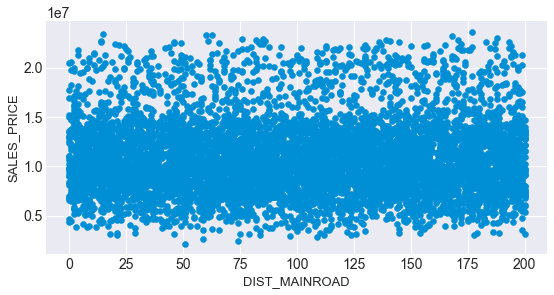

In [40]:
plt.figure(figsize= (8,4))
#fig, ax = plt.subplots()
plt.scatter(x = train['DIST_MAINROAD'], y = train_target)
plt.ylabel(response, fontsize=13)
plt.xlabel('DIST_MAINROAD', fontsize=13)
plt.show()


In [41]:
# Room Features
full_new['Other_rooms'] = full_new['N_ROOM'] - full_new['N_BEDROOM']
full_new['Ratio_rooms_bed'] = full_new['N_ROOM']/full_new['N_BEDROOM']
full_new['Ratio_rooms_bath'] = full_new['N_ROOM']/full_new['N_BATHROOM']
full_new['Ratio_bed_bath'] = full_new['N_BEDROOM']/full_new['N_BATHROOM']
full_new['SQFT_per_room'] = full_new['INT_SQFT']/full_new['N_ROOM']

# Rating New
full_new['Room_Rating'] = full_new['N_ROOM'] * full_new['QS_ROOMS']
full_new['BATHROOM_Rating'] = full_new['N_BATHROOM'] * full_new['QS_BATHROOM']
full_new['BEDROOM_Rating'] = full_new['N_BEDROOM'] * full_new['QS_BEDROOM']
full_new['Overall_Rating'] = (full_new['Room_Rating'] + full_new['BATHROOM_Rating'] + full_new['BEDROOM_Rating'])/3

In [42]:
full[['AREA']].groupby('AREA')

In [43]:
# Fee Variable
full_new['Other_FEE'] = full_new['REG_FEE'] - full_new['COMMIS']

In [44]:
# Sale Month July
full_new['is_saleMonth_july'] = full_new['Month_Sale'].apply(lambda x: 1 if x == 7 else 0)

# Sale Year
full_new['is_saleYear_bet0408'] = full_new['Year_Sale'].apply(lambda x: 1 if x > 2004 and x <= 2008 else 0)
full_new['is_saleYear_bet0811'] = full_new['Year_Sale'].apply(lambda x: 1 if x > 2008 and x <= 2011 else 0)
full_new['is_saleYear_bet1113'] = full_new['Year_Sale'].apply(lambda x: 1 if x > 2011 and x <= 2013 else 0)
full_new['is_saleYear_bet1315'] = full_new['Year_Sale'].apply(lambda x: 1 if x > 2013 and x <= 2015 else 0)

# Build Month
full_new['is_buildMonth_3_6_11'] = full_new['Month_Build'].apply(lambda x: 1 if x == 3 or x == 6 or x == 11 else 0)
full_new['is_buildMonth_1_7_8_10'] = full_new['Month_Build'].apply(lambda x: 1 if x == 1 or x == 7 or x == 8 or x == 10 else 0)
full_new['is_buildMonth_4_9'] = full_new['Month_Build'].apply(lambda x: 1 if x == 4 or x == 9 else 0)

# Age
full_new['is_Age_47_48_49_50_52'] = full_new['Age'].apply(lambda x: 1 if x == 47 or x == 48 or x == 49 or x == 50 or x == 52 else 0)


In [45]:
# Creating New Target Variable: 
# Base_Price = Sale_Price - Reg_fee - Commission

cost_price = train_target - train['REG_FEE'] - train['COMMIS']
print(cost_price.head())

price_per_sqft = train_target/train['INT_SQFT']
print(price_per_sqft.head())

cp_per_sqft = cost_price/train['INT_SQFT']
print(cp_per_sqft.head())

0     7075600
1    20653599
2    12645992
3     9196927
4     7095187
dtype: int64
0     7569.721116
1    10935.433031
2    14476.567657
3     5191.530997
4     6040.986949
dtype: float64
0     7047.410359
1    10399.596677
2    13911.982398
3     4957.912129
4     5787.265090
dtype: float64


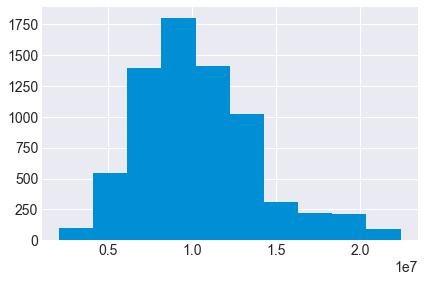

In [46]:
cost_price.hist()

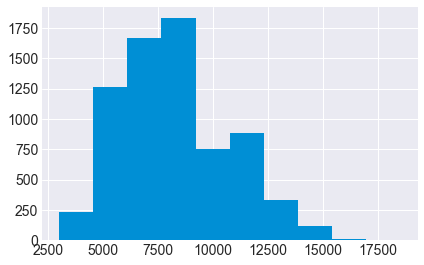

In [47]:
price_per_sqft.hist()

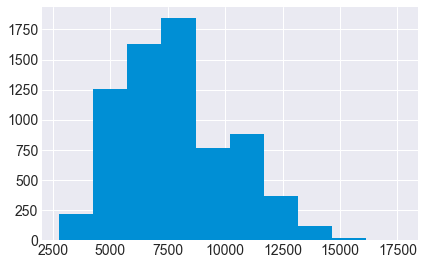

In [48]:
cp_per_sqft.hist()

In [49]:
# Updated Object Variables
obj_cols = [x for x in full_new.columns if full_new[x].dtype == 'object']
obj_cols = list(set(obj_cols) - set([]))
obj_cols

['AREA', 'SALE_COND', 'BUILDTYPE', 'MZZONE']

In [50]:
# Checking levels of each object columns

for x in obj_cols:
    print(x, ': ' , list(full[x].value_counts().shape))


AREA :  [7]
SALE_COND :  [5]
BUILDTYPE :  [3]
MZZONE :  [6]


In [51]:
# Checking no. of entries in each level

for x in obj_cols:
    print(x, ':' , list(full[x].value_counts()))
    # print(list(full[[x]].groupby([x]).size().shape))

AREA : [2427, 1884, 1410, 1403, 1123, 1072, 715]
SALE_COND : [2015, 2008, 2006, 2004, 2001]
BUILDTYPE : [3395, 3334, 3305]
MZZONE : [2613, 2601, 2601, 747, 741, 731]


In [52]:
full_new = pd.get_dummies(full_new, columns = obj_cols)

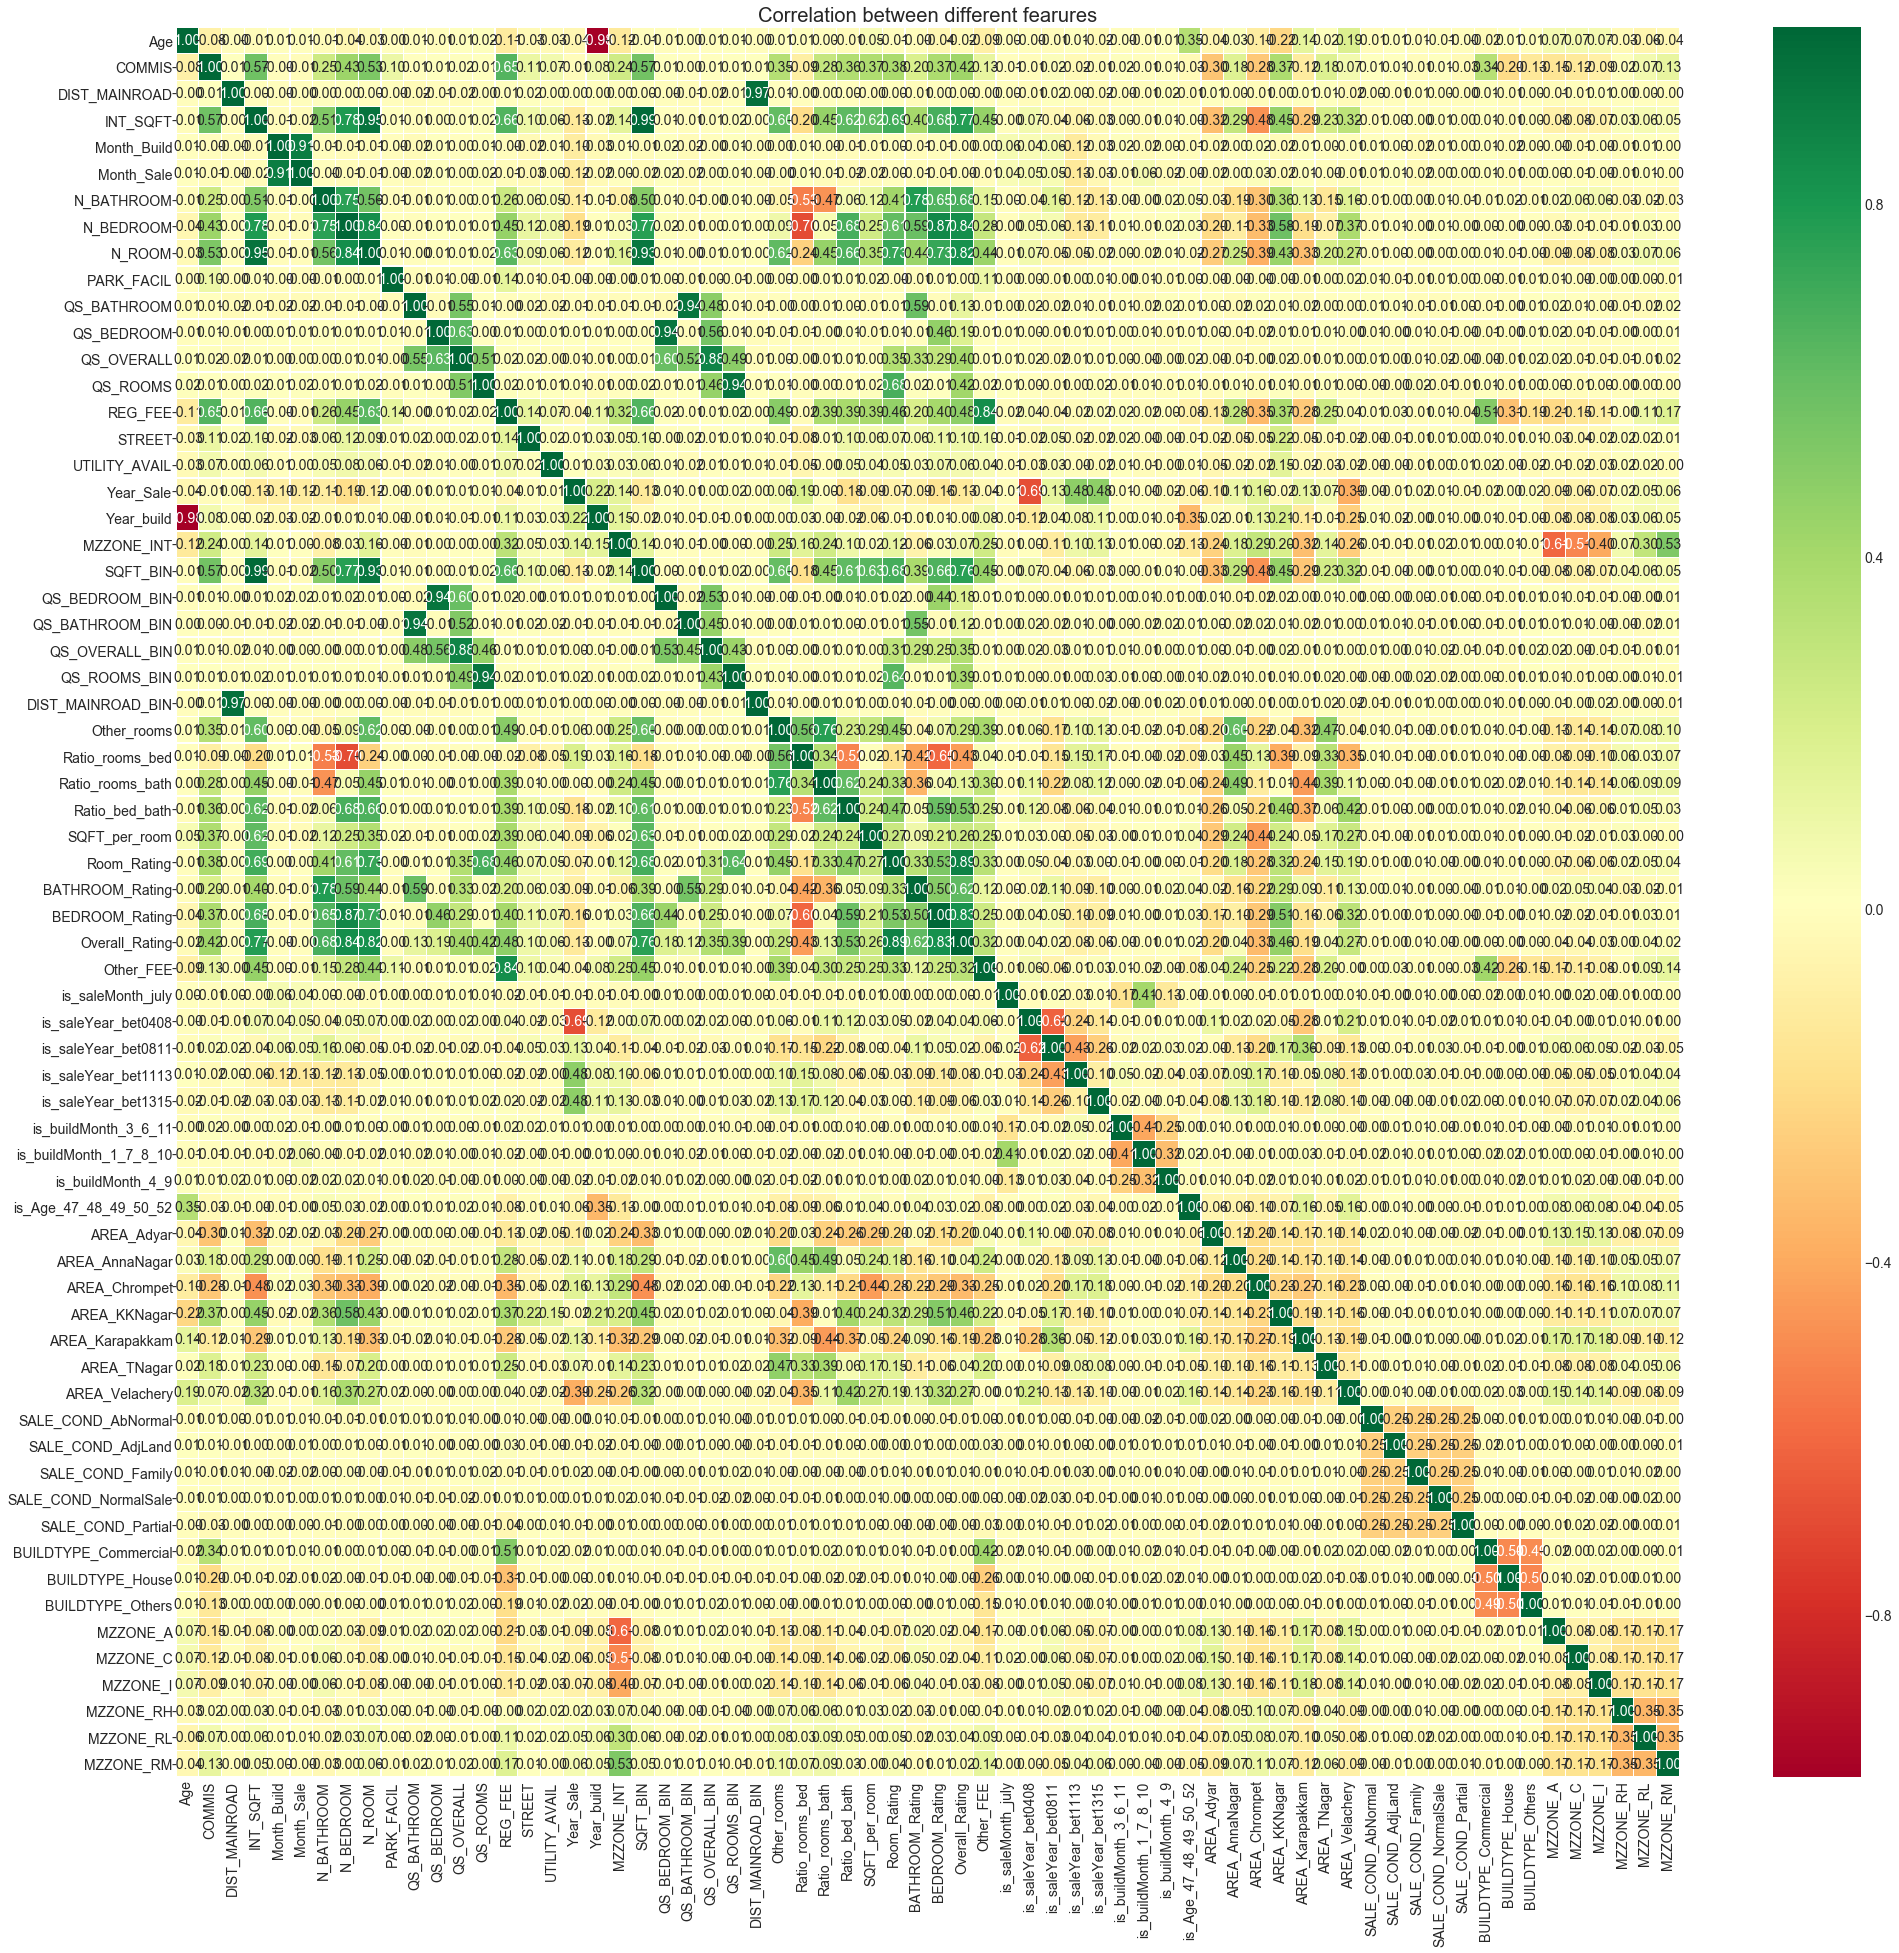

In [54]:
# Correlation Between The Features -----------------------------------------------------------------
plt.title('Correlation between different fearures')
sns.heatmap(full_new.corr(), annot = True, cmap = 'RdYlGn', vmax = 1,
            linewidths=0.2, fmt = '.2f', xticklabels=True, yticklabels=True) 
fig=plt.gcf()
fig.set_size_inches(30,30)
plt.show()

In [156]:
# Writing new data
full_new.to_csv(path_input + 'new_train.csv', index= False)

# Preparing Model Data

In [55]:
# Splitting Dataset
ctrain = full_new.iloc[0:nTrain,:]
ctest = full_new.iloc[nTrain::,:]
#ctest.drop(response, axis = 1, inplace = True)
ctest.head()

,Age,COMMIS,DIST_MAINROAD,INT_SQFT,Month_Build,Month_Sale,N_BATHROOM,N_BEDROOM,N_ROOM,PARK_FACIL,...,SALE_COND_Partial,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,27.0,93813,185,958,11,11,1.0,1.0,3,0,...,0,0,0,1,0,0,0,1,0,0
1,17.0,222246,108,1807,2,1,1.0,2.0,5,1,...,0,0,0,1,0,0,0,0,0,1
2,16.0,113159,59,1658,1,1,2.0,2.0,4,0,...,0,0,0,1,0,0,1,0,0,0
3,19.0,84442,102,1592,1,1,1.0,1.0,4,1,...,0,0,0,1,0,0,0,0,1,0
4,34.0,34849,62,857,5,5,1.0,1.0,3,0,...,0,0,1,0,0,0,0,1,0,0


In [56]:
ctest.shape

(2925, 66)

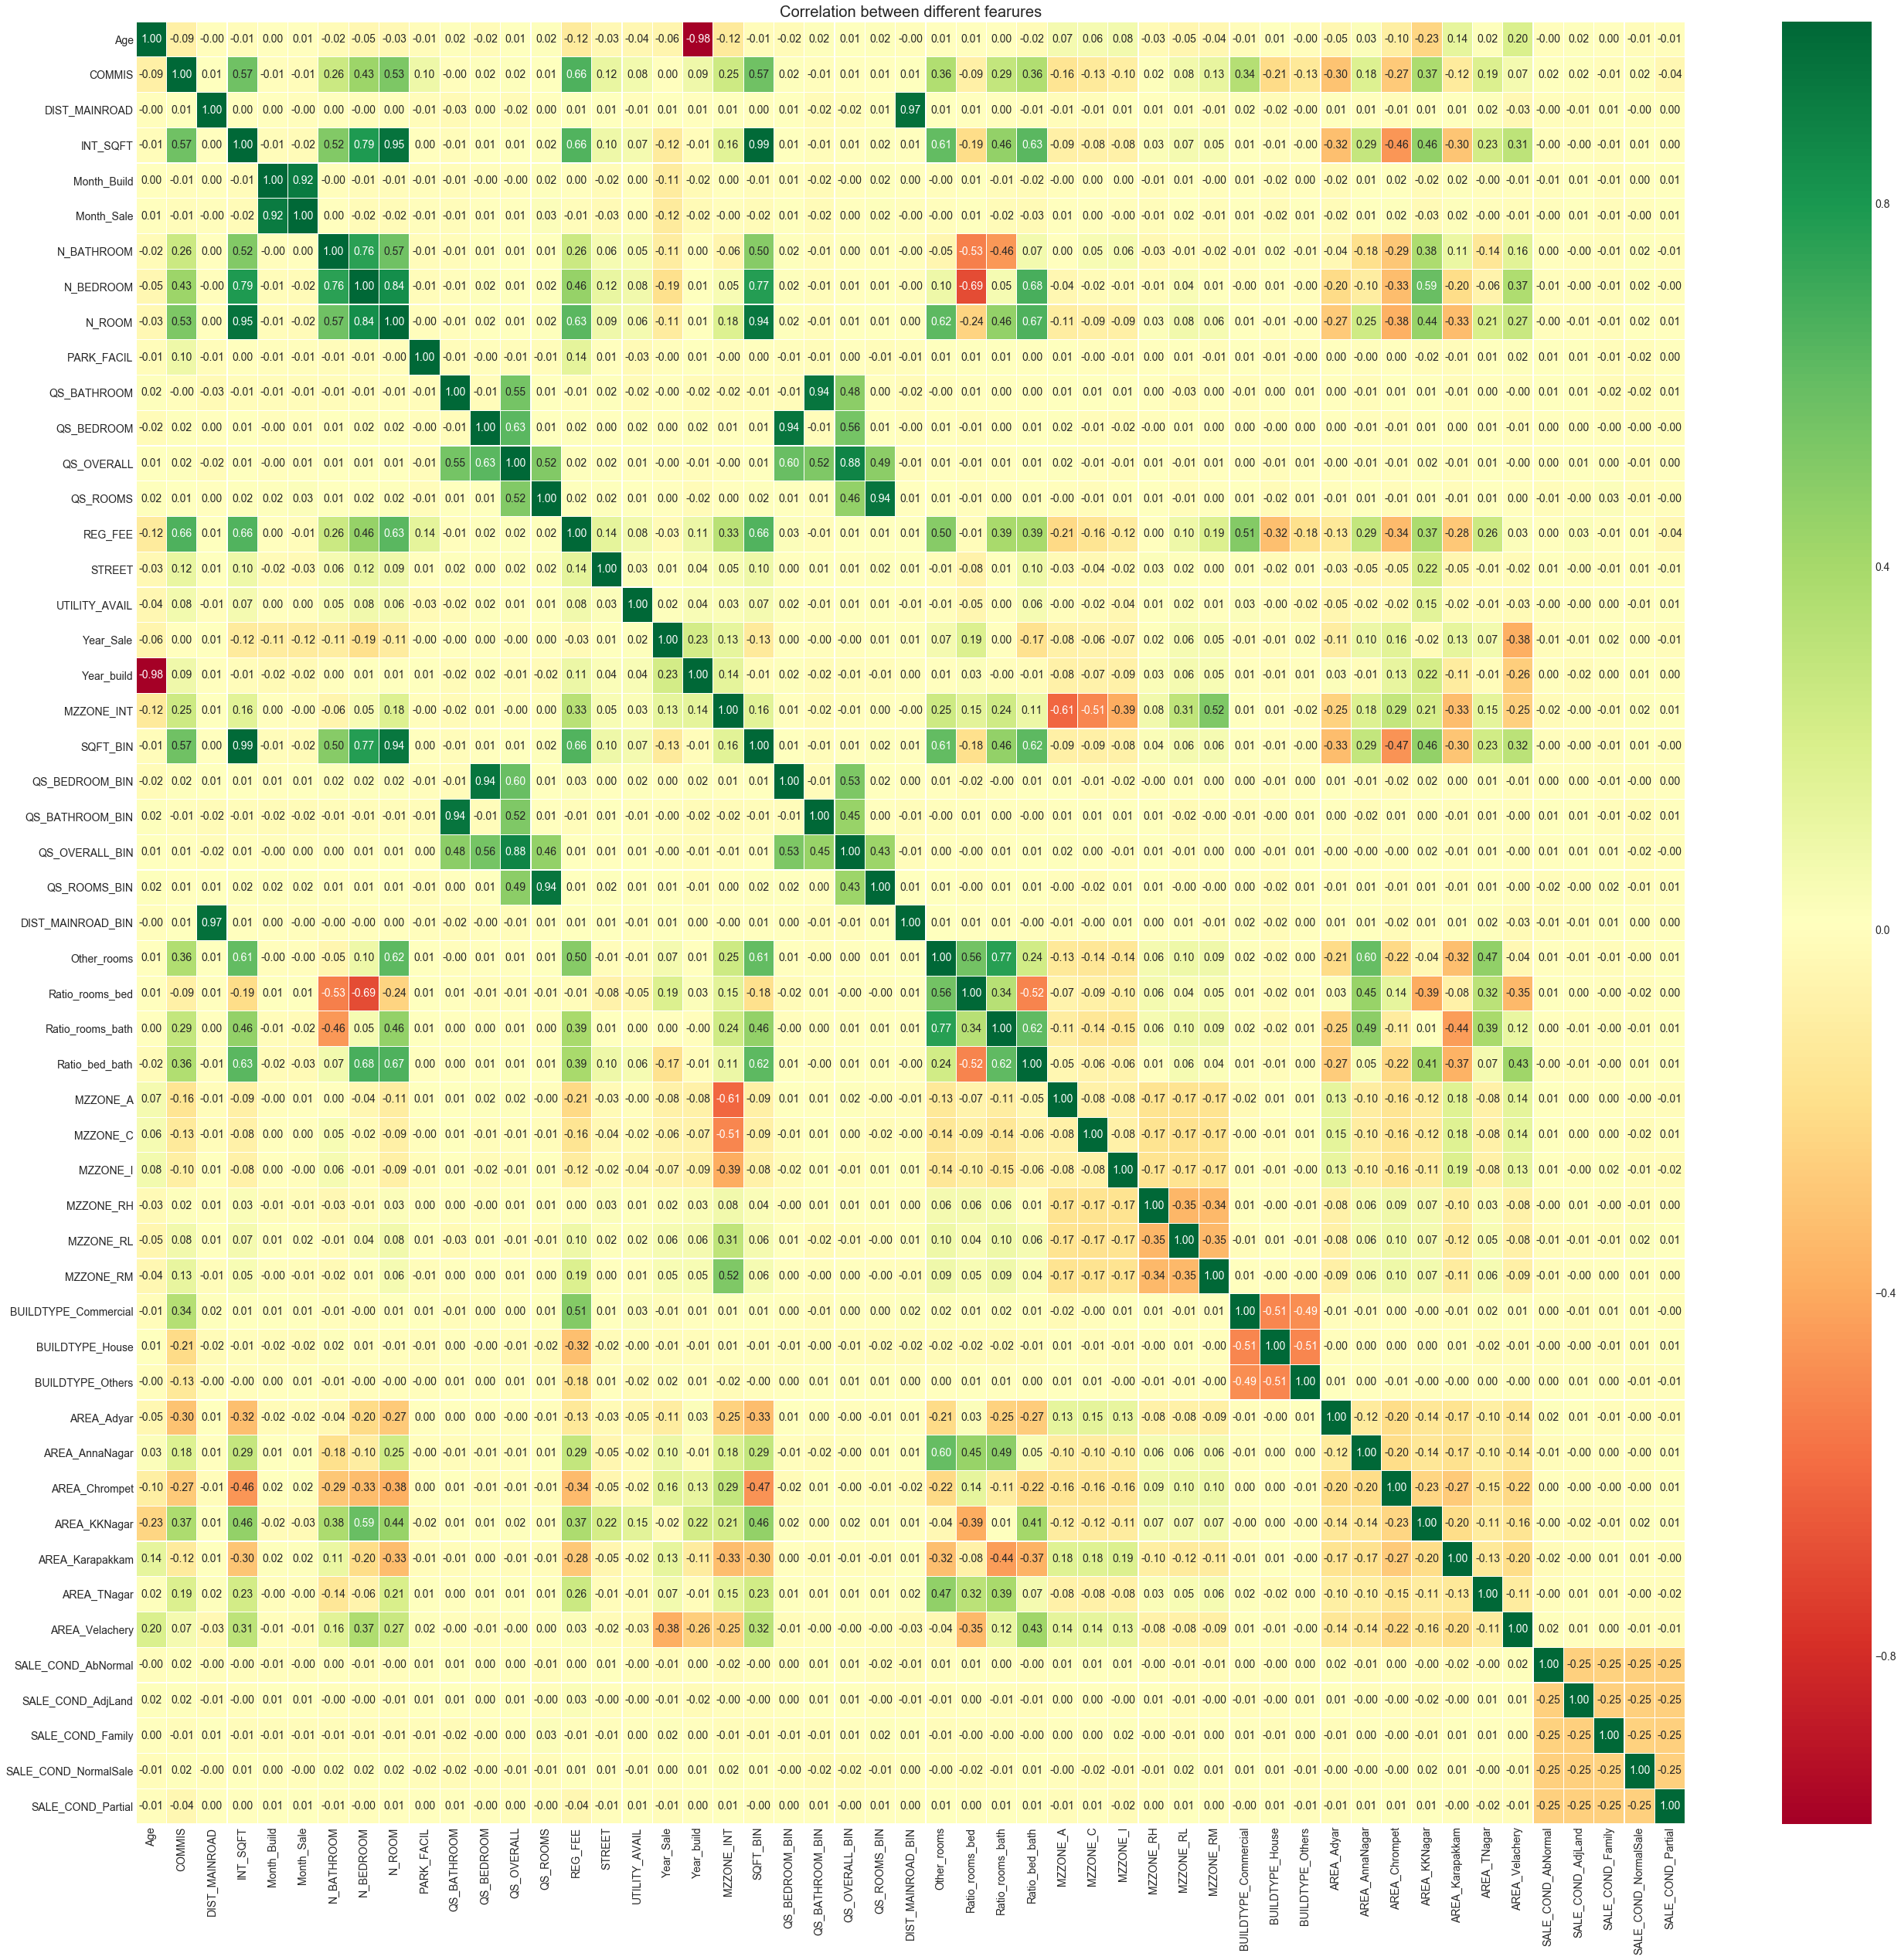

In [205]:
# Correlation Between The Features -----------------------------------------------------------------
plt.title('Correlation between different fearures')
sns.heatmap(ctrain.corr(), annot = True, cmap = 'RdYlGn', vmax = 1,
            linewidths=0.2, fmt = '.2f', xticklabels=True, yticklabels=True) 
fig=plt.gcf()
fig.set_size_inches(40,40)
plt.show()

In [57]:
#x = ctrain.drop(new_response, axis = 1)
#y = ctrain[new_response]
#y_original = ctrain['Price_per_sqft'] * ctrain['INT_SQFT']

x = ctrain
y_original = train_target

In [58]:
from scipy.special import boxcox1p, inv_boxcox1p

print(stats.skew(boxcox1p(price_per_sqft, 0.17)))

y = boxcox1p(price_per_sqft, 0.17)

0.001627864772305381


In [59]:
from scipy.special import boxcox1p, inv_boxcox1p

print(stats.skew(boxcox1p(cp_per_sqft, 0.17)))

y = boxcox1p(cp_per_sqft, 0.17)

0.0012593475587035355


In [60]:
#np.log(y).hist()
y.shape
#np.exp(np.log(y))

(7109,)

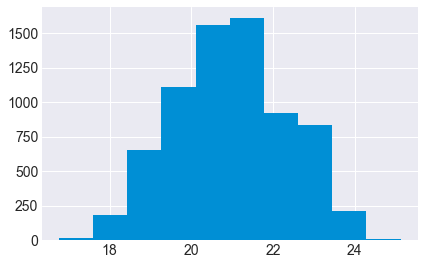

In [61]:
y.hist()

0.7731801507689303


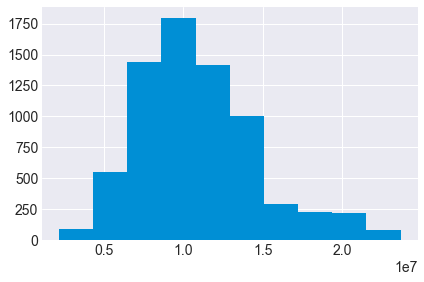

In [62]:
print(stats.skew(y_original))
y_original.hist()

In [63]:
(inv_boxcox1p(y, 0.17)*train['INT_SQFT'] + train['REG_FEE'] + train['COMMIS']).head()

0     7600000.0
1    21717770.0
2    13159200.0
3     9630290.0
4     7406250.0
dtype: float64

In [64]:
print(y.head())
print(y_original.head())

0    20.646995
1    22.460984
2    23.898184
3    19.107677
4    19.773373
dtype: float64
0     7600000
1    21717770
2    13159200
3     9630290
4     7406250
Name: SALES_PRICE, dtype: int64


In [65]:
full_new.isnull().sum()

Age                       0
COMMIS                    0
DIST_MAINROAD             0
INT_SQFT                  0
Month_Build               0
Month_Sale                0
N_BATHROOM                0
N_BEDROOM                 0
N_ROOM                    0
PARK_FACIL                0
QS_BATHROOM               0
QS_BEDROOM                0
QS_OVERALL                0
QS_ROOMS                  0
REG_FEE                   0
STREET                    0
UTILITY_AVAIL             0
Year_Sale                 0
Year_build                0
MZZONE_INT                0
SQFT_BIN                  0
QS_BEDROOM_BIN            0
QS_BATHROOM_BIN           0
QS_OVERALL_BIN            0
QS_ROOMS_BIN              0
DIST_MAINROAD_BIN         0
Other_rooms               0
Ratio_rooms_bed           0
Ratio_rooms_bath          0
Ratio_bed_bath            0
                         ..
is_saleMonth_july         0
is_saleYear_bet0408       0
is_saleYear_bet0811       0
is_saleYear_bet1113       0
is_saleYear_bet1315 

# Model Building

In [214]:
# Common Helpers
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, KFold
from sklearn.metrics import r2_score, mean_squared_error

# train test split
from sklearn.model_selection import train_test_split

In [509]:
# Cross Validation function
from sklearn.metrics import mean_squared_error

def cv_custom_rmse(model, x, y, test, n_folds = 10, test_prediction = False, feat_importance = False):
    kf = KFold(n_folds, shuffle = True, random_state = 23)
    test_pred = []
    train_score = []
    valid_score = []
    importance = []
    i = 1
    for train_index, valid_index in kf.split(x):
        x_train = x.iloc[train_index]
        y_train = y[train_index]
        x_valid = x.iloc[valid_index]
        y_valid = y[valid_index]
        
        # Model Fitting
        model.fit(x_train, y_train)
        if feat_importance == True:
            importance.append(model.feature_importance())
        
        # Training Prediction
        pred = model.predict(x_train)
        #pred = inv_boxcox1p(pred, 0.17) * x_train['INT_SQFT']
        #y_original = inv_boxcox1p(y_train, 0.17) * x_train['INT_SQFT']
        pred = inv_boxcox1p(pred, 0.17) * x_train['INT_SQFT'] + x_train['REG_FEE'] + x_train['COMMIS']
        y_original = inv_boxcox1p(y_train, 0.17) * x_train['INT_SQFT'] + x_train['REG_FEE'] + x_train['COMMIS']
        rmse_train = np.sqrt(mean_squared_error(y_original, pred))
        train_score.append(rmse_train)
        
        # Validation Prediction
        pred = model.predict(x_valid)
        #pred = inv_boxcox1p(pred, 0.17)*x_valid['INT_SQFT']
        #y_original = inv_boxcox1p(y_valid, 0.17)*x_valid['INT_SQFT']
        pred = inv_boxcox1p(pred, 0.17)*x_valid['INT_SQFT'] + x_valid['REG_FEE'] + x_valid['COMMIS']
        y_original = inv_boxcox1p(y_valid, 0.17)*x_valid['INT_SQFT'] + x_valid['REG_FEE'] + x_valid['COMMIS']
        rmse_valid = np.sqrt(mean_squared_error(y_original, pred))
        valid_score.append(rmse_valid)
        
        print('Split No: {}  | Train Score: {:.1f}  | Valid Score: {:.1f}'.format(i, rmse_train, rmse_valid))
        i+=1
        
        # Final Prediction
        if (test_prediction == True):
            pred = model.predict(ctest)
            #pred = inv_boxcox1p(pred, 0.17)*ctest['INT_SQFT']
            pred = inv_boxcox1p(pred, 0.17)*ctest['INT_SQFT'] + ctest['REG_FEE'] + ctest['COMMIS']
            test_pred.append(pred)
    
    print('\nCross-Validation Scores:')
    print("Training score: {:.1f} ({:.1f})".format(np.mean(train_score), np.std(train_score)))
    print("Validation score: {:.1f} ({:.1f})\n".format(np.mean(valid_score), np.std(valid_score)))
    score = pd.DataFrame({'Train_score': train_score, 'Valid_score': valid_score})
    
    # Feature Importance
    if feat_importance == True:
        feat_imp = pd.concat([pd.DataFrame(x_train.columns.values),
                              pd.DataFrame(np.mean(importance, axis = 0))], axis = 1)
        feat_imp.columns = ['Feature', 'Importance']
        feat_imp.sort_values(by = ['Importance'], ascending = False, inplace = True)
        # Feature Plot
        plt.figure(figsize = (12,8))
        plt.title("Feature importances")
        sns.barplot(y = 'Feature',x = 'Importance', data = feat_imp)
    else:
        feat_imp = []
    
    return score, test_pred, feat_imp

# Random Forest

In [487]:
rf = RandomForestRegressor(n_estimators = 1000, n_jobs = 3, oob_score = True)
rf.max_depth = 15
#rf.max_leaf_nodes = None
rf.min_samples_split = 3

rf_score, test_pred = cv_rmse(rf, x, y, ctest, 2, test_prediction=False)


Split No:  1
Training CV score: 194099.03123199038 
Validation CV score: 528237.8932430024 

Split No:  2
Training CV score: 199539.23204930685 
Validation CV score: 507720.5526379063 

Cross-Validation Scores:
Training score: 196819.1316 (2720.1004)
Validation score: 517979.2229 (10258.6703)



In [ ]:
train_preds = []
test_preds = []

rf.max_depth = 23
rf.max_leaf_nodes = None
rf.min_samples_split = 4

for i in range(100):
    #rf = RandomForestRegressor(random_state = i, n_estimators = 100, 
    #                            n_jobs = 3, oob_score = True)
    rf.random_state = i
    rf.fit(x, y)
    pred = rf.predict(x)
    rmse = np.sqrt(mean_squared_error(y, pred))
    print('RMSE of loop ' + str(i+1) + ' is : ' + str(rmse))
    train_preds.append(pred)
    test_preds.append(rf.predict(ctest))

In [302]:
train_pred = np.mean(train_preds, axis=0)
train_pred.shape

(7109,)

In [306]:
train.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,Year_Sale,Month_Sale,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,2011,5,131,1.0,1.0,3,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,2006,12,26,2.0,1.0,5,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,2012,2,70,1.0,1.0,3,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,2010,3,14,3.0,2.0,5,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,2009,10,84,1.0,1.0,3,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [308]:
# Test Prediction
pred = np.mean(test_preds, axis=0)
pred = pred * ctest['INT_SQFT']
sub = pd.DataFrame({idCol: sub_ids, response: pred}, columns = [idCol, response])
sub.to_csv(path_output + 'rf_sub_cv100_feat.csv', index=False)
sub.head()

,PRT_ID,SALES_PRICE
0,P05996,7.845406e+06
1,P09294,1.419325e+07
2,P03807,8.355537e+06
3,P00539,1.335271e+07
4,P01448,7.131820e+06


## Linear Model

In [342]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [343]:
LassoCV()

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [353]:
lasso = LassoCV(n_jobs = 4, cv=3)
lasso_cv, lasso_test_pred = cv_custom_rmse(lasso, x, y, ctest, 10, test_prediction=False)

Split No: 1  | Train Score: 1907075.8  | Valid Score: 1869484.6
Split No: 2  | Train Score: 1912644.7  | Valid Score: 1809647.6
Split No: 3  | Train Score: 1897110.6  | Valid Score: 2006562.0
Split No: 4  | Train Score: 1907342.8  | Valid Score: 1875854.8
Split No: 5  | Train Score: 1899748.3  | Valid Score: 1973297.5
Split No: 6  | Train Score: 1900542.4  | Valid Score: 1950670.6
Split No: 7  | Train Score: 1910800.9  | Valid Score: 1895233.3
Split No: 8  | Train Score: 1904677.2  | Valid Score: 1956000.0
Split No: 9  | Train Score: 1909006.0  | Valid Score: 1904698.6
Split No: 10  | Train Score: 1913420.9  | Valid Score: 1828515.3

Cross-Validation Scores:
Training score: 1906237.0 (5323.0)
Validation score: 1906996.4 (60642.1)



In [300]:
lm = LinearRegression(n_jobs = 4)
lm_cv, lm_test_pred = cv_custom_rmse(lm, x, y, ctest, 10, test_prediction=False)

Split No: 1  | Train Score: 574925.3  | Valid Score: 584846.4
Split No: 2  | Train Score: 576590.8  | Valid Score: 572551.1
Split No: 3  | Train Score: 578299.5  | Valid Score: 560713.9
Split No: 4  | Train Score: 579860.1  | Valid Score: 571103.8
Split No: 5  | Train Score: 578729.6  | Valid Score: 553735.4
Split No: 6  | Train Score: 577095.9  | Valid Score: 572225.7
Split No: 7  | Train Score: 574674.9  | Valid Score: 621020.3
Split No: 8  | Train Score: 575137.0  | Valid Score: 602411.9
Split No: 9  | Train Score: 577224.1  | Valid Score: 601731.9
Split No: 10  | Train Score: 577447.1  | Valid Score: 567196.3

Cross-Validation Scores:
Training score: 576998.4 (1626.9)
Validation score: 580753.7 (20238.2)



In [304]:
lm_train = lm.predict(x)
lm_test  = lm.predict(ctest)

In [301]:
RidgeCV()

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [302]:
ridge = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), cv = 5)
ridge_cv, ridge_test_pred = cv_custom_rmse(ridge, x, y, ctest, 10, test_prediction=False)

Split No: 1  | Train Score: 574978.7  | Valid Score: 584930.9
Split No: 2  | Train Score: 576643.9  | Valid Score: 572574.3
Split No: 3  | Train Score: 578357.5  | Valid Score: 560807.8
Split No: 4  | Train Score: 579915.4  | Valid Score: 571044.1
Split No: 5  | Train Score: 578787.4  | Valid Score: 553860.4
Split No: 6  | Train Score: 577151.6  | Valid Score: 572309.1
Split No: 7  | Train Score: 574726.2  | Valid Score: 621041.6
Split No: 8  | Train Score: 575191.5  | Valid Score: 602499.1
Split No: 9  | Train Score: 577278.0  | Valid Score: 601752.1
Split No: 10  | Train Score: 577499.8  | Valid Score: 567236.7

Cross-Validation Scores:
Training score: 577053.0 (1628.3)
Validation score: 580805.6 (20225.3)



In [ ]:
# Fitting Model
lm_test_pred = []
lm_train_pred = []
for i in [1, 10, 100, 1000]:
    lm.Cs = i
    lm.fit(x, y)
    pred = lm.predict_proba(x)
    lm_train_pred.append(pred)
    pred = lm.predict_proba(ctest)
    lm_test_pred.append(pred)

# Test Prediction
pred = np.mean(lm_test_pred, axis=0)[:,1]
sub = pd.DataFrame({idCol: sub_ids, response: pred}, columns = [idCol, response])
sub.to_csv(path_output + 'logistic_4cost.csv', index=False)
sub.head()

# Gradient Boost

In [138]:
from sklearn.ensemble import GradientBoostingRegressor
GradientBoostingRegressor()

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [509]:
gb = GradientBoostingRegressor(n_estimators=3000)

gb_cv, gb_test_pred = cv_custom_rmse(gb, x, y, ctest, 5, test_prediction=False)

Split No: 1  | Train Score: 44969.2  | Valid Score: 123698.1
Split No: 2  | Train Score: 46313.6  | Valid Score: 126152.9
Split No: 3  | Train Score: 46102.2  | Valid Score: 123901.2
Split No: 4  | Train Score: 47067.5  | Valid Score: 130472.9
Split No: 5  | Train Score: 43907.3  | Valid Score: 117781.1

Cross-Validation Scores:
Training score: 45671.9 (1109.3)
Validation score: 124401.2 (4111.1)



In [ ]:
#Cross-Validation Scores: 500
#Training score: 131214.3933 (3422.4229)
#Validation score: 167041.9379 (5147.6296)
    
#Cross-Validation Scores: 1000
#Training score: 92678.0738 (2127.1829)
#Validation score: 139759.7381 (3718.7310)

#Cross-Validation Scores: 2000
#Training score: 62108.1157 (1455.6514)
3Validation score: 127290.3103 (4410.0748)

#Cross-Validation Scores:
#Training score: 45671.9 (1109.3)
#Validation score: 124401.2 (4111.1)

In [506]:
gb = GradientBoostingRegressor(n_estimators=3000)

gb_cv, gb_test_pred = cv_rmse(gb, x, y_original, ctest, 5, test_prediction=False)

Split No: 1  | Train Score: 49076.7  | Valid Score: 147350.2
Split No: 2  | Train Score: 48677.1  | Valid Score: 148753.8
Split No: 3  | Train Score: 51659.6  | Valid Score: 157802.5
Split No: 4  | Train Score: 48240.4  | Valid Score: 151582.2
Split No: 5  | Train Score: 51088.9  | Valid Score: 150135.2

Cross-Validation Scores:
Training score: 49748.5 (1365.5)
Validation score: 151124.8 (3623.5)



In [ ]:
Cross-Validation Scores:
Training score: 69802.5 (1699.8)
Validation score: 158707.5 (3607.8)

In [455]:
# Test Prediction
#pred = np.mean(test_preds, axis=0)
pred = inv_boxcox1p(gb_test_pred, 0.17)*ctest['INT_SQFT']
#pred = pred * ctest['INT_SQFT']
sub = pd.DataFrame({idCol: sub_ids, response: pred}, columns = [idCol, response])
sub.to_csv(path_output + 'gb_sub_nest600_boxcox0.17_feat.csv', index=False)
sub.head()

,PRT_ID,SALES_PRICE
0,P05996,7.941897e+06
1,P09294,1.488680e+07
2,P03807,7.996925e+06
3,P00539,1.410914e+07
4,P01448,6.918671e+06


Training CV score: 0.05668328969591541 
Validation CV score: 0.1634070849393337 

Gradient Boost score: 0.1634 (0.0806)


# XGBoost

In [219]:
from xgboost import XGBRegressor
XGBRegressor()

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [490]:
xgb = XGBRegressor(n_estimators = 120000, learning_rate = 0.05, reg_alpha = 0.1, reg_lambda=3,
                   colsample_bytree=0.8, gamma=0, subsample=0.8, max_depth=2)

xgb_cv, xgb_test_pred = cv_custom_rmse(xgb, x, y, ctest, 10, test_prediction=False)

Split No: 1  | Train Score: 13383.1  | Valid Score: 75071.0


KeyboardInterrupt: 

In [ ]:
'''
Cross-Validation Scores: 1500
Training score: 74618.3 (2806.9)
Validation score: 129916.8 (4277.9)
'''

In [533]:
# Test Prediction
pred = np.mean(xgb_test_pred, axis=0)
#pred = pred * ctest['INT_SQFT']
sub = pd.DataFrame({idCol: sub_ids, response: pred}, columns = [idCol, response])
sub.to_csv(path_output + 'xgb_sub_cv10_est15000_lrate0.05_dep2,_a0.1_lmbd3_0.8.csv', index=False)
sub.head()

,PRT_ID,SALES_PRICE
0,P05996,7.882918e+06
1,P09294,1.483490e+07
2,P03807,8.048618e+06
3,P00539,1.396421e+07
4,P01448,6.954249e+06


# LightGBM

In [287]:
# LightGBM
import json
import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor
LGBMRegressor()

LGBMRegressor(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.1,
       max_bin=255, max_depth=-1, min_child_samples=10, min_child_weight=5,
       min_split_gain=0.0, n_estimators=10, n_jobs=-1, num_leaves=31,
       objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.0,
       silent=True, subsample=1.0, subsample_for_bin=50000,
       subsample_freq=1)

Split No: 1  | Train Score: 27393.4  | Valid Score: 82061.9
Split No: 2  | Train Score: 26509.0  | Valid Score: 77931.8
Split No: 3  | Train Score: 27800.9  | Valid Score: 74807.5
Split No: 4  | Train Score: 27793.0  | Valid Score: 89616.8
Split No: 5  | Train Score: 27038.1  | Valid Score: 80477.1
Split No: 6  | Train Score: 27353.9  | Valid Score: 83512.5
Split No: 7  | Train Score: 26354.9  | Valid Score: 102245.1
Split No: 8  | Train Score: 26956.7  | Valid Score: 77842.2
Split No: 9  | Train Score: 27077.4  | Valid Score: 75935.2
Split No: 10  | Train Score: 27290.4  | Valid Score: 75089.5

Cross-Validation Scores:
Training score: 27156.8 (453.4)
Validation score: 81952.0 (8016.1)



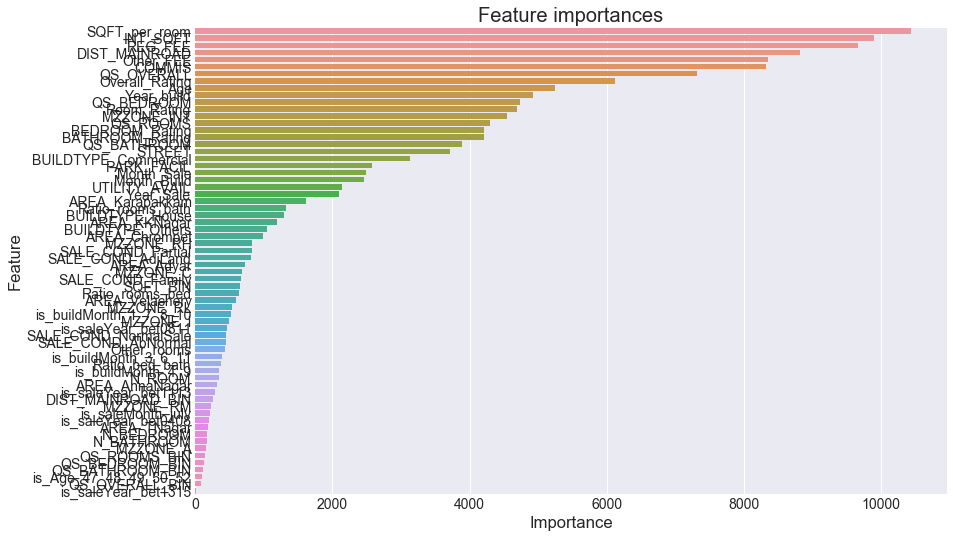

In [510]:
lgbm = LGBMRegressor(n_estimators=50000, learning_rate=0.05, max_depth=2, reg_lambda=2, reg_alpha=0.1,
                     subsample=0.8, colsample_bytree=0.8, num_leaves=21)

lgbm_cv, lgbm_test_pred, lgbm_feat = cv_custom_rmse(lgbm, x, y, ctest, 10, test_prediction=False, feat_importance=True)

In [513]:
lgbm_feat.head(50)

,Feature,Importance
61,SQFT_per_room,10432.9
3,INT_SQFT,9889.5
14,REG_FEE,9664.8
2,DIST_MAINROAD,8821.0
51,Other_FEE,8355.3
1,COMMIS,8323.8
12,QS_OVERALL,7320.9
65,Overall_Rating,6113.2
0,Age,5247.5
18,Year_build,4928.3


In [497]:
for i in [50000, 100000, 120000, 150000, 200000, 300000, 500000]:
    lgbm.n_estimators = i
    lgbm_test_pred_list = []
    lgbm_cv, lgbm_test_pred = cv_custom_rmse(lgbm, x, y, ctest, 10, test_prediction=True)
    lgbm_test_pred_list.append(lgbm_test_pred)

Split No: 1  | Train Score: 28315.3  | Valid Score: 81667.5
Split No: 2  | Train Score: 29200.5  | Valid Score: 87050.6
Split No: 3  | Train Score: 28568.7  | Valid Score: 74047.4
Split No: 4  | Train Score: 28615.4  | Valid Score: 90433.5
Split No: 5  | Train Score: 28915.7  | Valid Score: 86819.3
Split No: 6  | Train Score: 28667.4  | Valid Score: 78862.8
Split No: 7  | Train Score: 27680.5  | Valid Score: 108572.7
Split No: 8  | Train Score: 28028.4  | Valid Score: 78300.5
Split No: 9  | Train Score: 28522.1  | Valid Score: 80485.6
Split No: 10  | Train Score: 28420.5  | Valid Score: 78300.7

Cross-Validation Scores:
Training score: 28493.5 (405.5)
Validation score: 84454.0 (9319.9)

Split No: 1  | Train Score: 18247.5  | Valid Score: 79882.2
Split No: 2  | Train Score: 18629.5  | Valid Score: 84681.5
Split No: 3  | Train Score: 18355.3  | Valid Score: 72545.1
Split No: 4  | Train Score: 18326.8  | Valid Score: 87997.0
Split No: 5  | Train Score: 18491.0  | Valid Score: 84353.6
Spli

In [499]:
lgbm = LGBMRegressor(n_estimators=200000, learning_rate=0.05, max_depth=2, reg_lambda=2, reg_alpha=0.1,
                     subsample=0.8, colsample_bytree=0.8, num_leaves=91)
#lgbm = LGBMRegressor(n_estimators = 15000, learning_rate = 0.05, reg_alpha = 0.1, reg_lambda=3,
#                     colsample_bytree=0.8, gamma=0, subsample=0.8)
    
lgbm_cv, lgbm_test_pred = cv_custom_rmse(lgbm, x, y, ctest, 10, test_prediction=True)

Split No: 1  | Train Score: 10697.2  | Valid Score: 80368.6
Split No: 2  | Train Score: 10522.0  | Valid Score: 75330.4
Split No: 3  | Train Score: 10870.1  | Valid Score: 73719.1
Split No: 4  | Train Score: 10867.9  | Valid Score: 86940.3
Split No: 5  | Train Score: 10667.6  | Valid Score: 78481.7
Split No: 6  | Train Score: 10703.9  | Valid Score: 81842.1
Split No: 7  | Train Score: 10597.0  | Valid Score: 100615.0
Split No: 8  | Train Score: 10581.3  | Valid Score: 75328.8
Split No: 9  | Train Score: 10768.8  | Valid Score: 74648.6
Split No: 10  | Train Score: 10726.0  | Valid Score: 73962.9

Cross-Validation Scores:
Training score: 10700.2 (109.5)
Validation score: 80123.8 (7918.2)



In [ ]:
#Cross-Validation Scores:
#Training score: 20280.9 (184.2)
#Validation score: 70668.7 (5377.8)
    
#Cross-Validation Scores: 150000
#Training score: 15245.1 (175.7)
#Validation score: 72990.1 (6384.0)


In [410]:
lgbm.fit(x, y)
lgbm_train_pred = lgbm.predict(x)
lgbm_test_pred = lgbm.predict(ctest)

In [411]:
# Test Prediction
#pred = np.mean(lgbm_test_pred, axis=0)
#pred = pred * ctest['INT_SQFT']
pred = inv_boxcox1p(lgbm_test_pred, 0.17)*ctest['INT_SQFT'] + ctest['REG_FEE'] + ctest['COMMIS']
sub = pd.DataFrame({idCol: sub_ids, response: pred}, columns = [idCol, response])
sub.to_csv(path_output + 'lgbm_sub_full_est150000_lrate0.05_dep2_a0.1_lmbd3_0.8.csv', index=False)
sub.head()

,PRT_ID,SALES_PRICE
0,P05996,7.804638e+06
1,P09294,1.471330e+07
2,P03807,8.079976e+06
3,P00539,1.398506e+07
4,P01448,6.909211e+06


In [418]:
pred = inv_boxcox1p(lgbm_train_pred, 0.17)*x['INT_SQFT'] + x['REG_FEE'] + x['COMMIS']
#temp = pd.DataFrame({idCol: sub_ids, response: pred}, columns = [idCol, response])
temp = pd.DataFrame({'y_pred': pred, 'y_calc': lgbm_train_pred, 'Actual_y': y_original})
temp = pd.concat((x, temp), axis = 1)
temp.to_csv(path_input + 'train_data_lgbm.csv')

# Neural Net

In [258]:
from sklearn.neural_network import MLPRegressor
MLPRegressor()

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [265]:
mlp = MLPRegressor(alpha=0.1, hidden_layer_sizes = (50,50,20,20,), max_iter = 500000, learning_rate_init=0.05,
                   activation = 'logistic', learning_rate = 'adaptive')

mlp_cv, mlp_test_pred = cv_custom_rmse(mlp, x, y, ctest, 10, test_prediction=False)

Split No: 1  | Train Score: 3239142.9  | Valid Score: 3332277.3
Split No: 2  | Train Score: 3304623.0  | Valid Score: 3114677.2
Split No: 3  | Train Score: 3247100.6  | Valid Score: 3258495.7
Split No: 4  | Train Score: 3244460.1  | Valid Score: 3261197.0
Split No: 5  | Train Score: 3270866.8  | Valid Score: 3334511.3
Split No: 6  | Train Score: 3230940.1  | Valid Score: 3277989.3
Split No: 7  | Train Score: 3262583.4  | Valid Score: 3207367.3
Split No: 8  | Train Score: 3224846.9  | Valid Score: 3300797.2
Split No: 9  | Train Score: 3306325.9  | Valid Score: 3359250.4
Split No: 10  | Train Score: 3283453.3  | Valid Score: 3162018.5

Cross-Validation Scores:
Training score: 3261434.3 (27775.3)
Validation score: 3260858.1 (74900.1)

